# Extracting and plotting NXPol data





The following code has been adapted from Lindsay Bennett's and David Dufton's notebooks, available to download in my webpage. 
I have made the comments to the code, changed the names of the variables, the data file (same day - ideal weather conditions, but a different time) and the colourmaps.


NXPol radar produces three types of scans. We are interested in plotting two of these: PPI and RHI. A PPI scan is a 360° scan at a fixed elevation; an RHI scan is a 180° cross-sectional scan. We can understand the distribution of the targets through plotting two variables using the inputs from these two scans.

The variables we are going to plot are the Doppler velocity ($V$) and the differential reflectivity ($Z_{DR}$).

In [4]:
# First import useful packages

import pyart
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
import os

warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

%matplotlib inline

np.set_printoptions(suppress=True)


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## 1.1. Extracting data files from Jasmin

In [8]:
# Selecting the date for the PPI scan

date = '20170619'

In [10]:
# Path to the data files 

base_directory = '/gws/nopw/j04/ncas_radar_vol2/data/xband/chilbolton/cfradial/calib_v2/'

# Creating a new directory to save plots

output_directory = os.path.join('/home/users/marta_9/plots/', date)   # 'date' as the title of the directory


In [25]:
# The PPI files are stored in the 'sur' directory, which can be accessed as follows

sur_directory = os.path.join(base_directory,'sur/', date)

# Accessing the PPI files and listing them in order

sur_files = os.listdir(sur_directory)
sur_files.sort()

# Check how many files there are

print(len(sur_files))


# Print the first file 

print(sur_files[1])     # The path shows the time of the scan


215
ncas-mobile-x-band-radar-1_chilbolton_20170619-080939_SUR_v1.nc


In [34]:
# The RHI scans are stored in the 'rhi' directory, in the base directory

rhi_directory = os.path.join(base_directory,'rhi/', date)

rhi_files = os.listdir(rhi_directory)   
rhi_files.sort()

print(len(rhi_files))     # There are more RHI scans than PPI

print(rhi_files[1])

430
ncas-mobile-x-band-radar-1_chilbolton_20170619-000613_RHI_v1.nc


In [35]:
# Choose one file. I am choosing file n = 73 at time 08:09:39

n = 73

sur_file = os.path.join(sur_directory, sur_files[n]) 
print(sur_file)


/gws/nopw/j04/ncas_radar_vol2/data/xband/chilbolton/cfradial/calib_v2/sur/20170619/ncas-mobile-x-band-radar-1_chilbolton_20170619-080939_SUR_v1.nc


In [48]:
# Choose the RHI file for a similar time 08:08:46

n = 146      

rhi_file = os.path.join(rhi_directory, rhi_files[n])
print(rhi_file)


/gws/nopw/j04/ncas_radar_vol2/data/xband/chilbolton/cfradial/calib_v2/rhi/20170619/ncas-mobile-x-band-radar-1_chilbolton_20170619-080846_RHI_v1.nc


## 1.2. Uploading NetCDF file 


Alternatively to accessing the files from Jasmin, the datafile in GitHub can be downloaded into a local machine and uploaded into Jupyter.

In [5]:
sur_file = 'ncas-mobile-x-band-radar-1_chilbolton_20170619-073614_SUR_v1.nc'   # Name of the downloaded files 

rhi_file = 'ncas-mobile-x-band-radar-1_chilbolton_20170619-080846_RHI_v1.nc'

## 2. Extract variables to plot ($V$ and $Z_{DR}$)

In [7]:
# Save the PPI file into a variable called rad

rad = pyart.io.read(sur_file, delay_field_loading = True) 

# True to delay loading of field data from the file until the ‘data’ key in a particular field dictionary is accessed.
# In this case until 'sur_file' is loaded


# Do the same for the RHI file

#rad_rhi = pyart.io.read(rhi_file)

In [8]:
# Extract and check shape of the radar variables Doppler velocity and ZDR from rad

dopvel = rad.fields['V']['data']  
print(dopvel.shape)              

ZDR = rad.fields['ZDR']['data']
print(ZDR.shape)


(3600, 1000)
(3600, 1000)


In [9]:
# The radar has 10 elevations. They can be stored into an object 'el'

el = rad.elevation['data']
print(el.shape)             # There are 10 elevations * 360 degrees 
                            # therefore the elevation changes every 360 observations

(3600,)


In [10]:
# Extract the azimuth variable

azi = rad.azimuth['data']
print(azi.shape)

(3600,)


In [11]:
# Extact range array

rg = rad.range['data']/1000
print(rg.shape)

(1000,)


## 3. Plotting PPI and RHI scans 

In [14]:
# In order to make plots, a radar display should be created for the rad object

ppi_display = pyart.graph.RadarDisplay(rad)

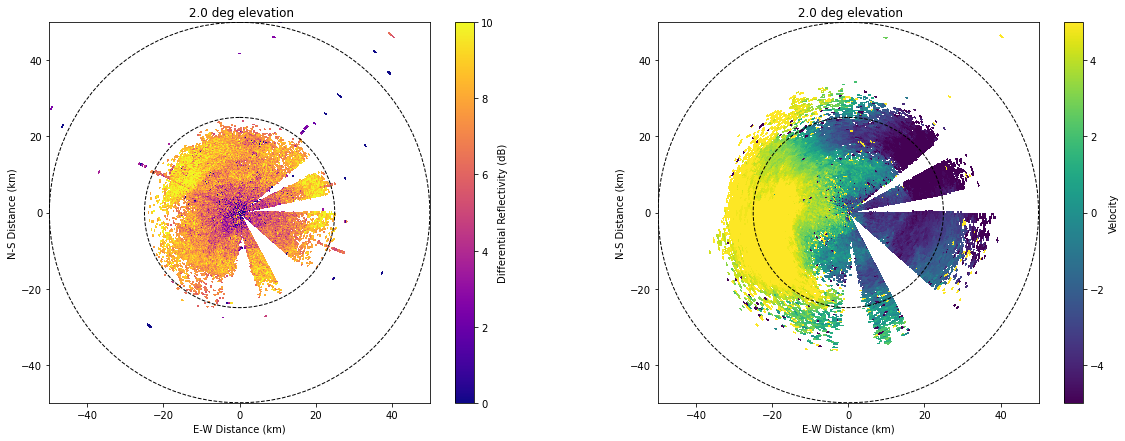

In [16]:
# We want to make 2 plots: one for the PPI scan and one for the RHI scan


fig = plt.figure(figsize = (20,7))  # Setting the plot sizes 


# Setting the axis for the plots and the position of the plots in the space created

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

        
# Setting parameters for the plot
    
i = 3                                                  # Sweep or elevation index
E = str(rad.elevation['data'][360*i])                  # Elevation value
T = sur_file[130:136] + ' ' + E + ' deg elevation'     # Setting title for the plot
    

xlabel = 'E-W Distance (km)'                     # Setting axis labels
ylabel = 'N-S Distance (km)'   

    
# To create the plots, select the radar variable, the sweep (elevation), fig size, the space ax1, the min and max luminance, colormap, finally title and axis and colobar labels

ppi_display.plot_ppi('ZDR', sweep = i, fig = fig, ax = ax1, vmin = 0, vmax = 10, cmap = 'plasma',
                title = T, axislabels = (xlabel, ylabel), colorbar_label = 'Differential Reflectivity (dB)')

ppi_display.plot_ppi('V', sweep = i, fig = fig, ax = ax2, vmin = -5, vmax = 5, cmap = 'viridis',
                title = T, axislabels = (xlabel, ylabel), colorbar_label = 'Velocity')


# We can zoom the plot by reducing axis limits and we can add range rings  

r = 50


for ax in [ax1, ax2]:

    ax.set_xlim([-r, r])
    ax.set_ylim([-r, r])
    ax.set_aspect('equal')
    ppi_display.plot_range_rings([25, 50], ax = ax, col = 'k', ls = '--', lw = 1)




/gws/smf/j04/ncas_radar/software/miniconda3_radar_group_20200519/envs/pyart_3_8_radar_group/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:256: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  warnings.warn("No projection was defined for the axes."


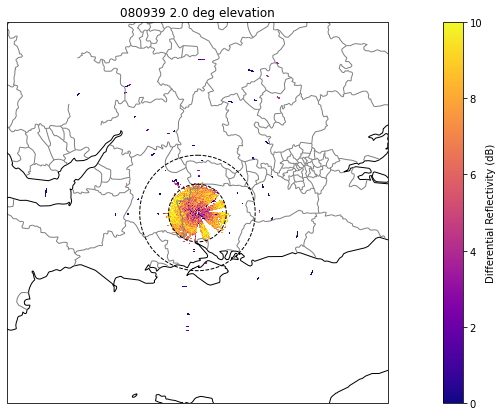

In [103]:
# The PPI scans can be plotted along with contour maps to give us an idea of the location around the radar

# For this purpose, we need a different type of display

ppi_display_map = pyart.graph.RadarMapDisplay(rad)

# Plotting the PPI scan for Doppler velocity

i = 3
E = str(rad.elevation['data'][360*i])           
T = sur_file[130:136] + ' ' + E + ' deg elevation'

fig = plt.figure(figsize = (20,7))
ax1 = fig.add_subplot(1,1,1)

# Adding the attribute "map" and resolution 

ppi_display_map.plot_ppi_map('ZDR', resolution = '10m', sweep = i, fig = fig, ax = ax1, vmin = 0, vmax = 10, cmap = 'plasma', title = T, colorbar_label = 'Differential Reflectivity (dB)')

ppi_display_map.plot_range_rings([25,50], ax=ax, col='k',ls='--',lw=1)


In [106]:
# To plot the RHI scan, create another display object

rhi_display = pyart.graph.RadarDisplay(rad_rhi)

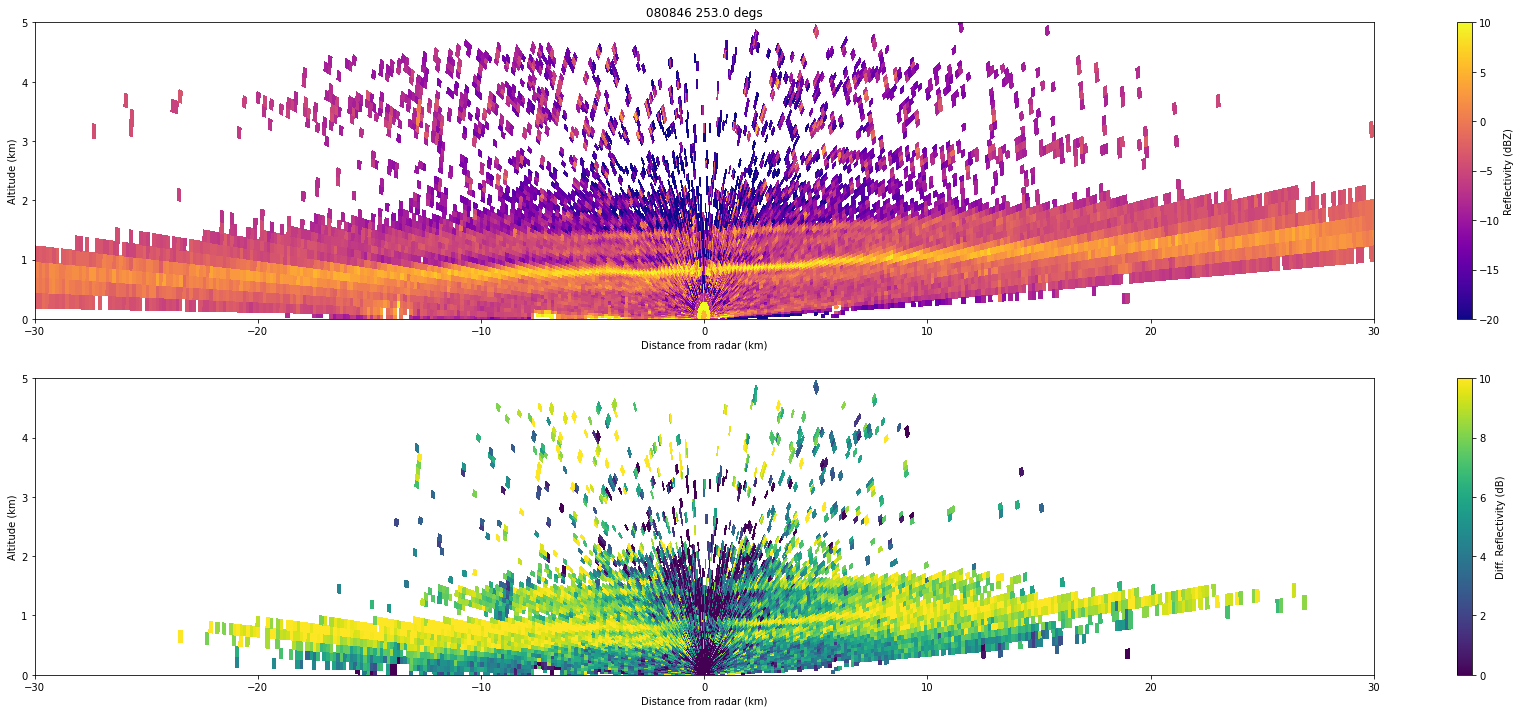

In [119]:
# The plots are created in the same way as the PPI plots

A = str(rad_rhi.azimuth['data'][0])       # Starting azimuth
T = rhi_file[130:136]+ ' ' + A + ' degs'  # Setting title for plots


fig = plt.figure(figsize = (30,12))

xlabel = 'Distance from radar (km)'     # Setting axis labels
ylabel = 'Altitude (km)'

# Create axis for first plot

ax1 = fig.add_subplot(2, 1, 1)   


rhi_display.plot_rhi('dBZ', 0, vmin=-20, vmax=10.,title=T,colorbar_label='Reflectivity (dBZ)',
                   axislabels=(xlabel, ylabel), cmap = 'plasma')

display.set_limits(ylim = [0, 5], xlim = [-30, 30])


# Create axis for second plot

ax2 = fig.add_subplot(2, 1, 2)

rhi_display.plot_rhi('ZDR', 0, vmin=0, vmax=10.,title_flag=False,colorbar_label='Diff. Reflectivity (dB)',
                   axislabels=(xlabel, ylabel), cmap = 'viridis')

display.set_limits(ylim = [0, 5], xlim = [-30, 30])
